In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('fin_train.csv')

In [3]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [5]:
df.drop(['ID','City_Code','Region_Code'],inplace=True,axis=1)

In [6]:
df['Health Indicator'].mode()

0    X1
dtype: object

In [7]:
df['Holding_Policy_Duration'].mode()

0    1.0
dtype: object

In [8]:
df['Holding_Policy_Type'].mode()

0    3.0
dtype: float64

In [9]:
df['Health Indicator'].fillna(0,inplace=True)

In [10]:
df['Holding_Policy_Duration'].fillna(1,inplace=True)

In [11]:
df['Holding_Policy_Type'].fillna(3,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accomodation_Type        50882 non-null  object 
 1   Reco_Insurance_Type      50882 non-null  object 
 2   Upper_Age                50882 non-null  int64  
 3   Lower_Age                50882 non-null  int64  
 4   Is_Spouse                50882 non-null  object 
 5   Health Indicator         50882 non-null  object 
 6   Holding_Policy_Duration  50882 non-null  object 
 7   Holding_Policy_Type      50882 non-null  float64
 8   Reco_Policy_Cat          50882 non-null  int64  
 9   Reco_Policy_Premium      50882 non-null  float64
 10  Response                 50882 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 3.3+ MB


<AxesSubplot:xlabel='Response', ylabel='count'>

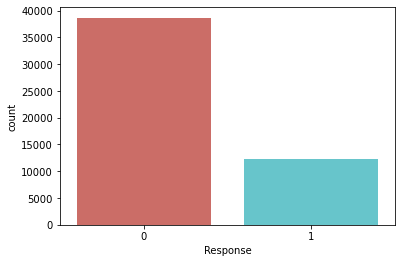

In [13]:
sns.countplot(x="Response",data=df,palette="hls")


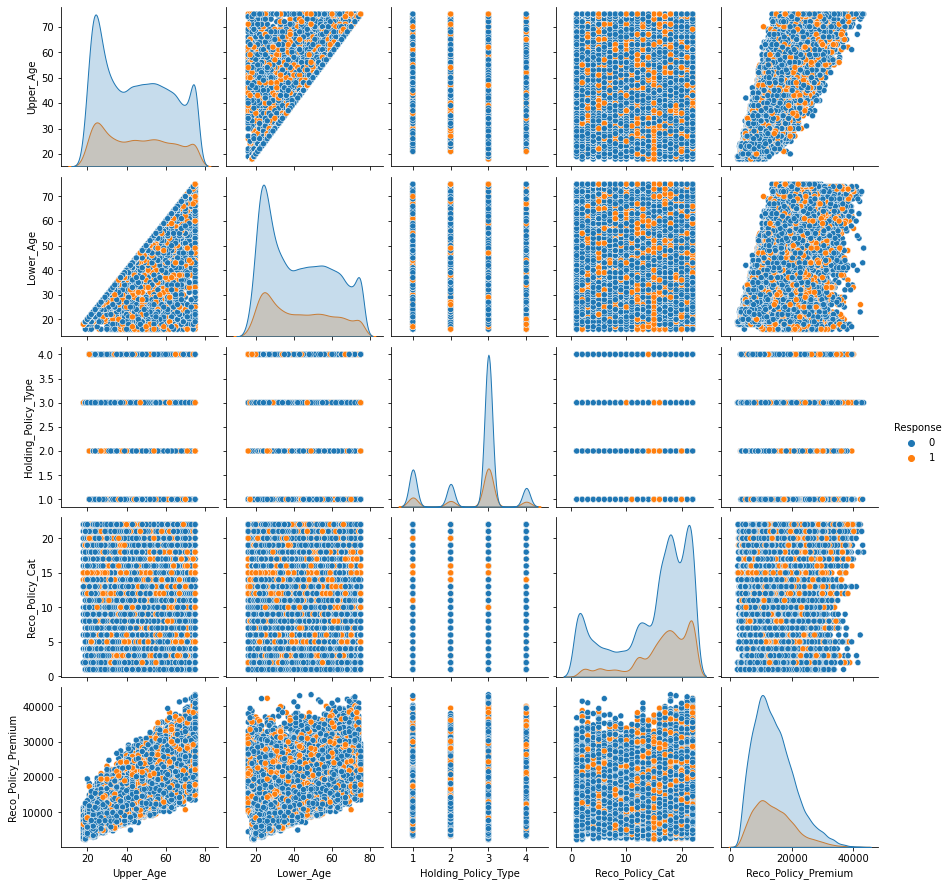

In [14]:
sns.pairplot(df,hue='Response')

In [15]:
df.drop(['Holding_Policy_Duration'],inplace=True,axis=1)

In [16]:
df = pd.get_dummies(df,columns = ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'],drop_first = True)

In [17]:
df.head()

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,36,36,3.0,22,11628.0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,75,22,3.0,22,30510.0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,32,32,1.0,19,7450.0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,52,48,3.0,19,17780.0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,44,44,1.0,16,10404.0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [18]:
df_=pd.read_csv('fin_test.csv')


In [19]:
df_.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [20]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.7+ MB


In [21]:
df_.drop(['ID','City_Code','Region_Code'],inplace=True,axis=1)

In [22]:
df_['Health Indicator'].fillna(0,inplace=True)

In [23]:
df_['Holding_Policy_Duration'].fillna(1,inplace=True)

In [24]:
df_['Holding_Policy_Type'].fillna(3,inplace=True)

In [25]:
df_.drop(['Holding_Policy_Duration'],inplace=True,axis=1)

In [26]:
df_ = pd.get_dummies(df_,columns = ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'],drop_first = True)

In [27]:
X = df.loc[:,df.columns!="Response"]

In [37]:
y=df['Response']

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Upper_Age', 'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Accomodation_Type_Rented',
       'Reco_Insurance_Type_Joint', 'Is_Spouse_Yes', 'Health Indicator_X2',
       'Health Indicator_X3', 'Health Indicator_X4', 'Health Indicator_X5',
       'Health Indicator_X6', 'Health Indicator_X7', 'Health Indicator_X8',
       'Health Indicator_X9']

df[numerical] = scaler.fit_transform(df[numerical])

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Upper_Age', 'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Accomodation_Type_Rented',
       'Reco_Insurance_Type_Joint', 'Is_Spouse_Yes', 'Health Indicator_X2',
       'Health Indicator_X3', 'Health Indicator_X4', 'Health Indicator_X5',
       'Health Indicator_X6', 'Health Indicator_X7', 'Health Indicator_X8',
       'Health Indicator_X9']

df_[numerical] = scaler.fit_transform(df_[numerical])

In [30]:
df.head()

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,0.315789,0.338983,0.666667,1.000000,0.227609,0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.101695,0.666667,1.000000,0.687356,0,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.245614,0.271186,0.000000,0.857143,0.125881,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.596491,0.542373,0.666667,0.857143,0.377401,0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.456140,0.474576,0.000000,0.714286,0.197807,0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_.head()

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,0.210526,0.237288,0.666667,0.190476,0.235009,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.894737,0.881356,0.666667,0.809524,0.722007,0.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.175439,0.203390,1.000000,0.761905,0.170286,1.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.087719,0.118644,0.666667,0.809524,0.166587,1.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,1.000000,0.666667,0.190476,0.489669,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df.shape

(50882, 18)

In [33]:
df_.shape

(21805, 17)

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression


In [40]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\chinamma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
pred = classifier.predict(df_)

In [42]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
import pandas as pd 
pd.DataFrame(pred).to_csv("sample.csv")

In [48]:
df2=pd.read_csv("sample.csv")

In [49]:
df2.head()

,Unnamed: 0,0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [51]:
df1=pd.read_csv("fin_sample.csv")

In [52]:
df1.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [53]:
ID=df1['ID']

0        50883
1        50884
2        50885
3        50886
4        50887
         ...  
21800    72683
21801    72684
21802    72685
21803    72686
21804    72687
Name: ID, Length: 21805, dtype: int64

In [55]:
sol = pd.DataFrame()

In [56]:
sol['ID']=ID

In [57]:
sol['Response']=pred

In [61]:
pd.DataFrame(sol).to_csv('sample.csv',index=False)

In [62]:
df4=pd.read_csv('sample.csv')

In [63]:
df4.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
